# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import pandas as pd
import numpy as np

In [2]:
# El mantra de las visualizaciones
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (10., 5.)})
sns.set_style('whitegrid')

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [3]:
temp = pd.read_csv("Temp_States.csv")


#### Print `temp`

In [4]:
temp.sample(3)

,City,State,Temperature
6,Newark,New Jersey,20.000000
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [5]:
# your answer here
temp.info()
#city and State are strings
# Temperature is a column of decimal numbers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


#### Select the rows where state is New York

In [6]:
temp[temp["State"] == "New York"]

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [7]:
# your answer here
avg_temp_NYC = temp[temp["State"] == "New York"].agg({"Temperature":"mean"}).values
round(avg_temp_NYC[0],2)

10.74

#### We want to know cities and states with Temperature above 15 degress Celcius

In [8]:
# your answer here
temp[["City","State"]][temp["Temperature"] > 15]

,City,State
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [9]:
temp[["City"]][temp["Temperature"]>15]

,City
0,NYC
3,Hartford
5,Treton
6,Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [10]:
temp[["City"]][(temp["Temperature"]>15) & (temp["Temperature"]<20)]


,City
0,NYC
3,Hartford


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [11]:
mean_state = temp.groupby("State").agg({"Temperature":"mean"}).reset_index()
mean_state

,State,Temperature
0,Connecticut,15.833333
1,New Jersey,21.111111
2,New York,10.740741


In [12]:
std_state = temp.groupby("State").agg({"Temperature":"std"}).reset_index()
std_state

,State,Temperature
0,Connecticut,1.964186
1,New Jersey,1.571348
2,New York,8.133404


In [13]:
def meanstd (df,col1,col2):
    meandf = df.groupby(col1).agg({col2:"mean"}).reset_index().rename({col2:"media"}, axis=1)
    stddf = df.groupby(col1).agg({col2:"std"}).reset_index().rename({col2:"dev"}, axis=1)
    return meandf.merge(stddf, on = col1)
    

In [14]:
meanstd(temp,"State","Temperature")

,State,media,dev
0,Connecticut,15.833333,1.964186
1,New Jersey,21.111111,1.571348
2,New York,10.740741,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [15]:
employee = pd.read_csv("employee.csv")
employee.sample(3)

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30
5,Eva,Sales,Bachelor,F,associate,2,55
0,Jose,IT,Bachelor,M,analyst,1,35


#### Explore the data types of the Temp dataframe. Comment your results

In [16]:
employee.info()
#all columns are srings but Years and Salary, that are integers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

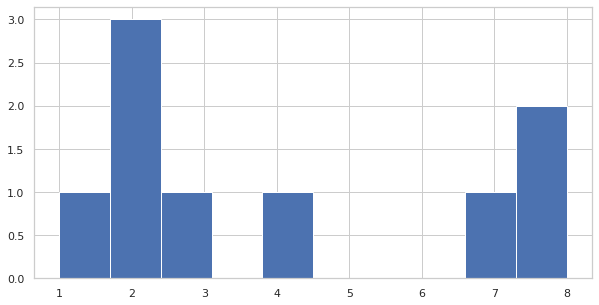

In [17]:
plt.hist(data = employee, x= "Years");

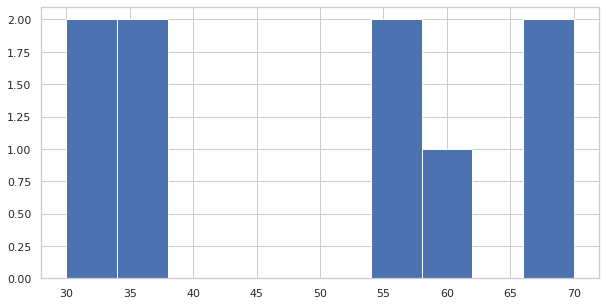

In [18]:
plt.hist(data = employee, x= "Salary");

#### What's the average salary in this company?

In [19]:
round(employee["Salary"].mean(),2)

48.89

#### What's the highest salary?

In [20]:
employee["Salary"].max()

70

#### What's the lowest salary?

In [21]:
employee["Salary"].min()


30

#### Who are the employees with the lowest salary?

In [22]:
employee[employee["Salary"] == employee["Salary"].min()]

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [23]:
employee[employee["Name"] == "David"]

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [24]:
print((employee["Salary"][employee["Name"] == "David"].values)[0])

30


#### Print all the rows where job title is associate

In [25]:
employee[employee["Title"] == "associate"]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [26]:
employee.head(3)


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [27]:
employee.iloc[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [28]:
employee[(employee["Title"] == "associate") & (employee["Salary"] >= 55)]


,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [29]:
employee.groupby("Years").agg({"Salary":"mean"}).reset_index()

,Years,Salary
0,1,35.000000
1,2,38.333333
2,3,55.000000
3,4,35.000000
4,7,60.000000
5,8,70.000000


####  What is the average Salary per title?

In [56]:
employee.groupby("Title").agg({"Salary":"mean"}).reset_index()

,Title,Salary
0,VP,70.000000
1,analyst,32.500000
2,associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.

##### * Hint : Quantiles vs Quartiles*

##### - In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.

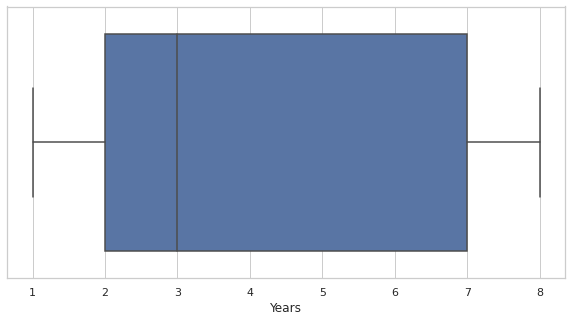

In [63]:
sns.boxplot(data=employee, x="Years");

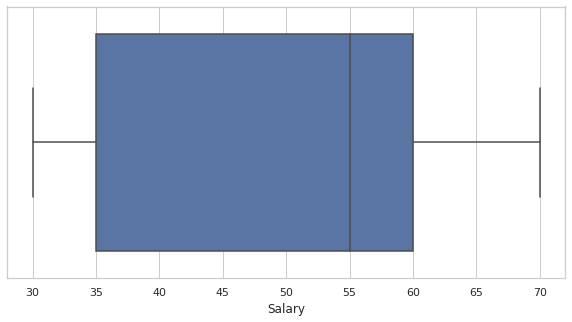

In [61]:
sns.boxplot(data=employee, x="Salary");

In [72]:
int(employee.Years.quantile(0.25))

2

In [75]:
int(employee.Salary.quantile(0.25))

35

In [73]:
int(employee.Years.quantile(0.75))

7

In [76]:
int(employee.Salary.quantile(0.75))

60

#### Is the mean salary per gender different?

In [74]:
employee.groupby("Gender").agg({"Salary":"mean"}).reset_index()

,Gender,Salary
0,F,47.5
1,M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [35]:
# your answer here

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [36]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [37]:
# your answer here

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [38]:
# your answer here

In [39]:
# your answer here

####  What is the average Purchase Price?

In [40]:
# your answer here

#### What were the highest and lowest purchase prices? 

In [41]:
# your answer here

In [42]:
# your answer here

#### Select all the customers we have in Spain

In [43]:
# your answer here

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [44]:
# your answer here

#### Select all the customers who have bought more than 50 items ?

In [45]:
# your answer here

#### Select orders from Spain that are above 50 items

In [46]:
# your answer here

#### Select all free orders

In [47]:
# your answer here

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [48]:
# your answer here

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [49]:
# your answer here

#### Show the frequency distribution of the amount spent in Spain.

In [50]:
# your answer here

#### Select all orders made in the month of August

In [51]:
# your answer here

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [52]:
# your answer here

#### What's the  average amount of money spent by country

In [53]:
# your answer here

#### What's the most expensive item?

In [54]:
# your answer here

#### What was the average amount spent per year ?

In [55]:
# your answer here